# Proyek Analisis Data: Bike-sharing-dataset
- **Nama : Ilham Oktavian**
- **Email : ilhamoktavian74@gmail.com**
- **ID Dicoding : ilham_oktavian_74**

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Berapa total terpinjam pada bulan Desember 2012?
- Pertanyaan 2 : Bagaimana kinerja peminjaman dalam setahun terakhir?

### Connect to Google Drive

In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Semua Packages/Library yang Digunakan

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Wrangling

### Gathering Data

In [113]:
url = './drive/MyDrive/Dataset/day.csv'
day = pd.read_csv(url)
day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [114]:
url2 = './drive/MyDrive/Dataset/hour.csv'
hour = pd.read_csv(url2)
hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [115]:
q = hour.groupby('dteday')['cnt'].sum().reset_index()
q

,dteday,cnt
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600
...,...,...
726,2012-12-27,2114
727,2012-12-28,3095
728,2012-12-29,1341
729,2012-12-30,1796


### Assessing Data

In [116]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Perbedaan dataset day dan hour adalah dataset day adalah akumulasi dari dataset hour. Berikut merupakan penjelasan tiap kolom:
* instant: indeks
* dteday : tanggal peminjaman sepeda
* season : musim ketika peminjaman sepeda dilakukan. Musim dingin (1), musim semi (2), musim panas (3), musim gugur (4)
* yr : tahun. 2011 (0), 2012 (1)
* mnth : bulan, 1 sampai 12
* hr : jam, 1 hari 24 jam (0 hingga 23)
* holiday :  indikator yang menunjukkan apakah hari itu merupakan hari libur atau tidak
* weekday : hari dalam seminggu
* workingday : indikator yang jika hari tersebut bukan akhir pekan atau hari libur maka nilainya 1, jika tidak maka nilainya 0
* weathersit : kondisi cuaca pada saat peminjaman sepeda dilakukan. Cerah (1), Mendung (2), Hujan atau salju ringan (3), Hujan Lebat (4)
* temp :   suhu dalam derajat Celsius pada saat peminjaman sepeda dilakukan
* atemp: suhu yang dirasakan dalam derajat Celsius pada saat peminjaman sepeda dilakukan
* hum: Kelembapan
* windspeed: Kecepatan angin
* casual: jumlah peminjam sepeda biasa, yang tidak  berlangganan tetap
* registered: jumlah peminjam sepeda yang terdaftar member
* cnt: total jumlah peminjam sepeda, yaitu gabungan dari jumlah peminjam casual dan peminjam terdaftar

In [117]:
print("Jumlah entri untuk setiap kolom dalam data hour:")
hour.nunique()

Jumlah entri untuk setiap kolom dalam data hour:


,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [118]:
hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


tidak ada missing values dalam setiap kolom

In [119]:
hour.duplicated().sum()

0

tidak ada data yang duplikat

In [120]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

**outliers**

In [121]:
Q1 = (hour['cnt']).quantile(0.25)
Q3 = (hour['cnt']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = hour['cnt'] < minimum
kondisi_more_than = hour['cnt'] > maximum

print(kondisi_lower_than.sum() + kondisi_more_than.sum())

505


karena jumlah outlier hanya sedikit jadi bisa langsung didrop

In [122]:
hour.drop(hour[kondisi_lower_than].index, inplace=True)
hour.drop(hour[kondisi_more_than].index, inplace=True)
hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Memperbaiki tipe data**

In [123]:
hour['dteday'] = pd.to_datetime(hour['dteday'])

In [124]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16874 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     16874 non-null  int64         
 1   dteday      16874 non-null  datetime64[ns]
 2   season      16874 non-null  int64         
 3   yr          16874 non-null  int64         
 4   mnth        16874 non-null  int64         
 5   hr          16874 non-null  int64         
 6   holiday     16874 non-null  int64         
 7   weekday     16874 non-null  int64         
 8   workingday  16874 non-null  int64         
 9   weathersit  16874 non-null  int64         
 10  temp        16874 non-null  float64       
 11  atemp       16874 non-null  float64       
 12  hum         16874 non-null  float64       
 13  windspeed   16874 non-null  float64       
 14  casual      16874 non-null  int64         
 15  registered  16874 non-null  int64         
 16  cnt         16874 non-null 

## Exploratory Data Analysis (EDA)

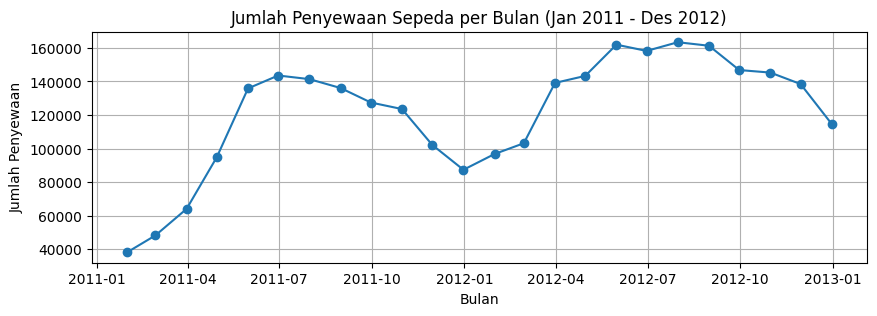

In [125]:
bulanan = hour.groupby(pd.Grouper(key='dteday', freq='M')).sum()
plt.figure(figsize=(10, 3))
plt.plot(bulanan.index, bulanan['cnt'],marker='o',linestyle='-')
plt.title('Jumlah Penyewaan Sepeda per Bulan (Jan 2011 - Des 2012)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.show()

In [126]:
fitur = ['mnth', 'hr', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
for feature in fitur:
    fig = px.histogram(hour, x=feature, y='cnt', title=f'Distribusi {feature}')
    fig.update_traces(marker_line_color='black', marker_line_width=1)
    fig.update_layout(yaxis_title='Jumlah peminjam')
    fig.show()

In [127]:
w = ['yr', 'holiday', 'workingday', 'weathersit']

for w in w:
    fig = px.pie(hour, names=w, values='cnt',
                 title=f'Distribusi Jumlah Penyewaan Berdasarkan {w}')
    fig.show()

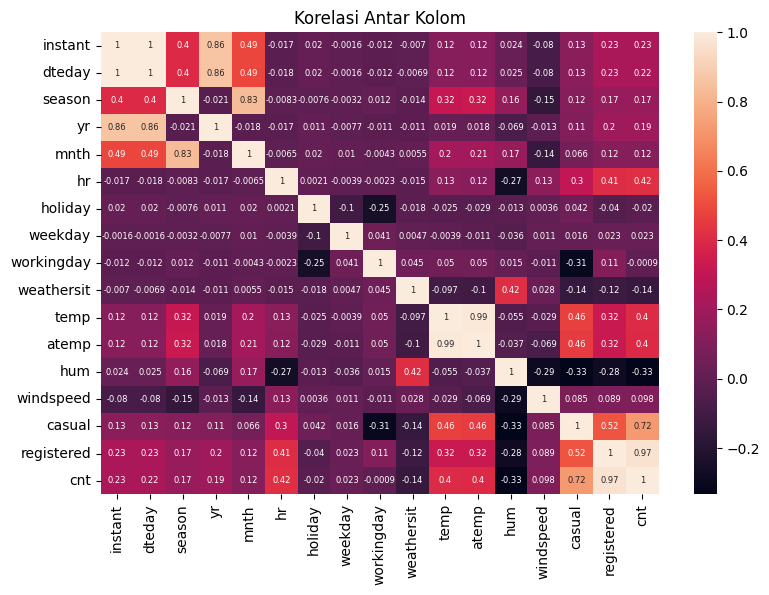

In [128]:
matrikskorelasi = hour.corr()
plt.figure(figsize=(9,6))
sns.heatmap(matrikskorelasi, annot=True, annot_kws={"size": 6})
plt.title('Korelasi Antar Kolom')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa total terpinjam pada bulan Desember 2012?

In [129]:
total = hour[(hour['yr'] == 1) & (hour['mnth'] == 12)]['cnt'].sum()

print("Total terpinjam pada bulan Desember 2012:", total)

Total terpinjam pada bulan Desember 2012: 114538


### Pertanyaan 2: Bagaimana kinerja peminjaman dalam setahun terakhir?

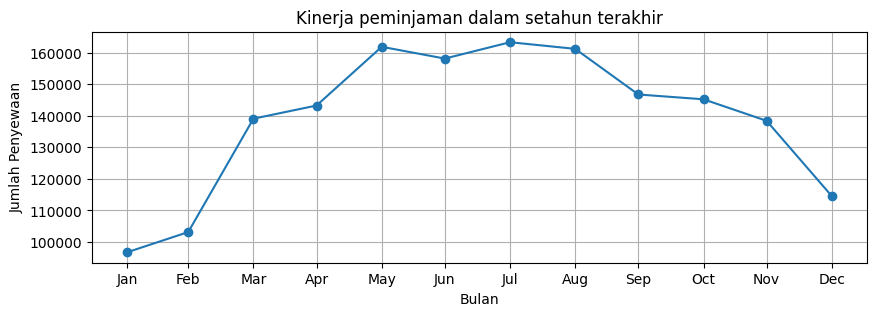

In [130]:
data = hour[hour['yr'] == 1]
bulan = data.groupby(pd.Grouper(key='dteday', freq='M')).sum()
plt.figure(figsize=(10, 3))
plt.plot(bulan.index, bulan['cnt'], marker='o', linestyle='-')
plt.xticks(bulan.index, bulan.index.strftime('%b'))
plt.title('Kinerja peminjaman dalam setahun terakhir')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.show()

## Conclusion

- Conclution pertanyaan 1: Total sepeda terpinjam pada bulan Desember 2012 yaitu 114.538
- Conclution pertanyaan 2: dari bulan januari hingga mei peminjaman sepeda terus meningkat, sempat turun sedikit pada bulan juni, namun naik kembali pada bulan juli (pada bulan ini tercapai peminjaman terbanyak pada tahun 2012), namun setelah bulan juli jumlah peminjaman sepeda mengalami penurunan hingga akhir tahun 2012
- Berdasarkan matriks korelasi didapatkan faktor yang paling berpengaruh yaitu jam peminjaman. Dan berdasarkan distribusinya, sepeda paling sering dipinjam pada pukul 4 sore hingga 7 malam
- Selain jam, suhu juga sangat berpengaruh pada minat meminjam. Suhu yang dirasa nyaman untuk bersepeda yakni pada suhu 0.6 hingga 0.7 Celsius